# **Lennard-Jones gas**

In this code we simulate ...

**Credits**
* Juan Andrés Guarín Rojas
* [GitHub](https://github.com/AndresGuarin)


This notebook follows the next order
* [1. Computational scheme](#sec_1)

# **Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ECond.simulation.solver as solver

import matplotlib.animation as animation
from datetime import datetime

## **Some ideas**

* Only calculate forces for the moving particles (electrons)

# **1. Computational scheme** <a class="anchor" id="sec_1"></a>

The Coulomb's force of a ith particle due to the presence of a jth particle is given by
$$\vec{F}_i^{\,(Coulomb)} = \frac{1}{4\pi\epsilon_0}\frac{q_i q_j}{r_{ij}^3}\vec{r}_{ij}$$
where $\vec{r}_{ij}=\vec{r}_i-\vec{r}_j$ Now, the Lorentz force of a ith particle due to the presence of the external fields $\vec{E}$ and $\vec{B}$ is
$$\vec{F}_i^{\,(Lorentz)} = q_i\left(\vec{E} + \vec{v}_i\times\vec{B} \right)\,,$$
where $\vec{v}_i$ is the velocity of the ith particle.


For implementing this equations into the code we define the next dimensionless quantities:
$$\bar{t}=\sqrt{\frac{e^2}{4\pi\epsilon_0 m_e\sigma^3}}t\,,$$
$$ \vec{r}' = \frac{\vec{r}}{\sigma}\,,$$
$$ \vec{v}' = \frac{d\vec{r}'}{d\bar{t}}$$
$$ \bar{r}_{ij} =\frac{r_{ij}}{\sigma}\,, $$
$$\bar{q}_i = \frac{q_i}{e}$$
where $\sigma=361.5\times 10^{-12}[\text{m}]$ is the lattice constant cristal structure of copper, $e$ is the elemental charge and $m_e$ is the electron rest mass. We also define the next dimensionless fields

$$\vec{E}' = \frac{4\pi\epsilon_0 \sigma^2}{e}\vec{E}$$
$$\vec{B}' = \sqrt{\frac{4\pi\epsilon_0\sigma^3}{m_e}} \vec{B}$$

With this definitions the Newton's Law of motion for the electrons is left as
$$ \frac{d^2\vec{r}'_{i}}{d \bar{t}^2}=\sum\limits_{j=1}^{N} \frac{\bar{q}_i \bar{q}_j}{\bar{r}_{ij}^2}\hat{r}'_{ij} + \bar{q}\left(\vec{E}'+\vec{v}'_i\times\vec{B}' \right) \,.$$ 

# **2. Test**

In [2]:
# Choose parameters 
h = 0.01; N = 2000; NL = 1; NF=1

# Set intial conditions
X0 = np.array([1,0])
Y0 = np.array([0,0])
Vx0 = np.array([0,0])
Vy0 = np.array([1,0])
Q = np.array([-1,1])

# Set external fields
def B1(X,Y,t):
    return X*0 #In order: [Bz]

def E1(X,Y,t):
     return [X*0, X*0] #In order: [Ex, Ey]

def B2(X,Y,t):
     return X*0 - 10

sim = solver.ECond(h,N,NL,NF,E1,B1)
s = sim.simulate([X0,Y0,Vx0,Vy0,Q])

self1 = sim.get_self()

In [3]:
%matplotlib auto
%matplotlib auto

Using matplotlib backend: <object object at 0x000001630976B4F0>
Using matplotlib backend: QtAgg


In [4]:
%matplotlib inline

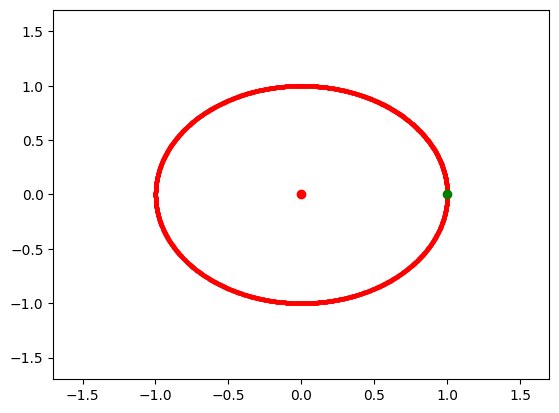

In [5]:
X1 = s[0][:,0]
Y1 = s[1][:,0]
X2 = s[0][:,1]
Y2 = s[1][:,1]
plt.plot(X1,Y1,'-b',lw=1.5)
plt.plot(X1,Y1,'or',ms=2)
plt.plot(X2,Y2,'-',color='orange',lw=1.5)
plt.plot(X2[0],Y2[0],'or')
plt.plot(X1[0],Y1[0],'og')
D=1.7
plt.xlim(-D,D)
plt.ylim(-D,D)
plt.show()